RMSE: 125725.50
R² Score: 0.878


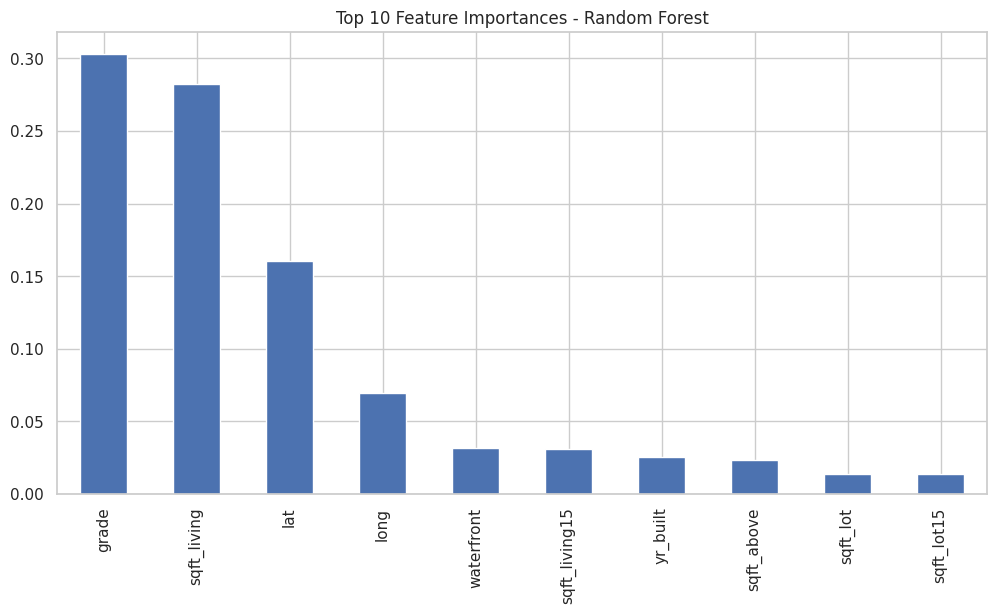

📌 Analysis: This chart shows the most influential variables in Random Forest's prediction of house prices.


In [1]:
# 📦 Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 📋 Configuration
sns.set(style="whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 📥 Load dataset
df = pd.read_csv("/content/kc_house_data.csv")

# 🧼 Data cleaning
df = df.drop_duplicates()
df = df[(df['bedrooms'] > 0) & (df['bathrooms'] > 0)]
df = df.drop(columns=['id', 'date'])

# 🎯 Features and Target
X = df.drop(columns='price')
y = df['price']

# 🔡 Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# 🔀 Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 📏 Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🌲 Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 🔍 Predictions
y_pred = model.predict(X_test)

# 📊 Evaluation
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")

# 🔥 Feature Importances
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12,6))
importances.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()

print("📌 Analysis: This chart shows the most influential variables in Random Forest's prediction of house prices.")
